In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm


import matplotlib.colors 
from collections import Counter
cmap2 = cm.get_cmap('twilight',13)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set style
sns.set(style='whitegrid')

In [5]:
df = pd.read_csv('pokemon.csv')

In [6]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
df.info()
# describes dataset
# object is categorical variable 
# int64 is numerical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [12]:
# unique value counts
for i in list(df.columns):
    print("{} has unique value counts equal to {}".format(i, df[i].value_counts().shape[0]))

# has unique value counts equal to 721
Name has unique value counts equal to 800
Type 1 has unique value counts equal to 18
Type 2 has unique value counts equal to 18
Total has unique value counts equal to 200
HP has unique value counts equal to 94
Attack has unique value counts equal to 111
Defense has unique value counts equal to 103
Sp. Atk has unique value counts equal to 105
Sp. Def has unique value counts equal to 92
Speed has unique value counts equal to 108
Generation has unique value counts equal to 6
Legendary has unique value counts equal to 2


In [44]:
# Total Attack

df_a = df.sort_values(by='Attack',ascending=False)[:10][['Name','Attack']]
df_a

,Name,Attack
163,MewtwoMega Mewtwo X,190
232,HeracrossMega Heracross,185
424,GroudonPrimal Groudon,180
426,RayquazaMega Rayquaza,180
429,DeoxysAttack Forme,180
711,KyuremBlack Kyurem,170
494,GarchompMega Garchomp,170
527,GalladeMega Gallade,165
387,BanetteMega Banette,165
454,Rampardos,165


In [45]:
df_d = df.sort_values(by = 'Defense', ascending = False)[:10][['Name', 'Defense']]
df_d

,Name,Defense
230,Shuckle,230
224,SteelixMega Steelix,230
333,AggronMega Aggron,230
223,Steelix,200
414,Regirock,200
789,Avalugg,184
98,Cloyster,180
87,SlowbroMega Slowbro,180
332,Aggron,180
456,Bastiodon,168


###### we learn about the best attacking and defensive pokemons

## Analysis of pokemons by Type

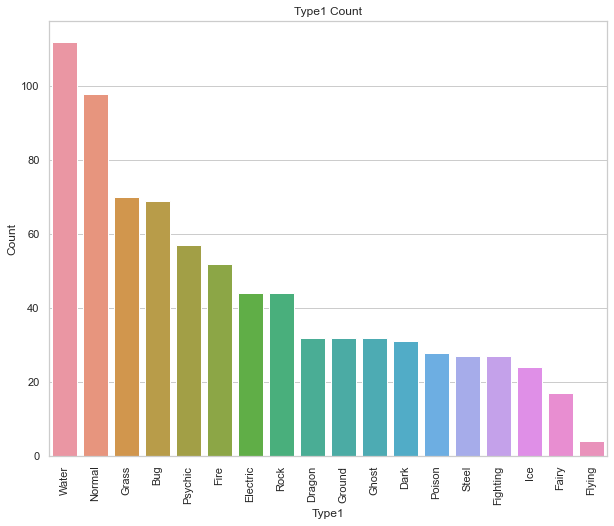

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x='Type 1',data=df,order = df['Type 1'].value_counts().index)
plt.xlabel('Type1')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Type1 Count')


plt.show()

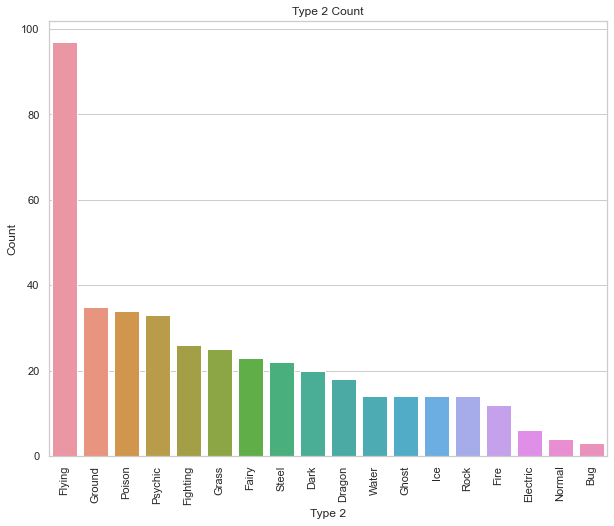

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x='Type 2',data=df,order = df['Type 2'].value_counts().index)
plt.xlabel('Type 2')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Type 2 Count')


plt.show()

###### The count of pokemon by types 

## Correlation 

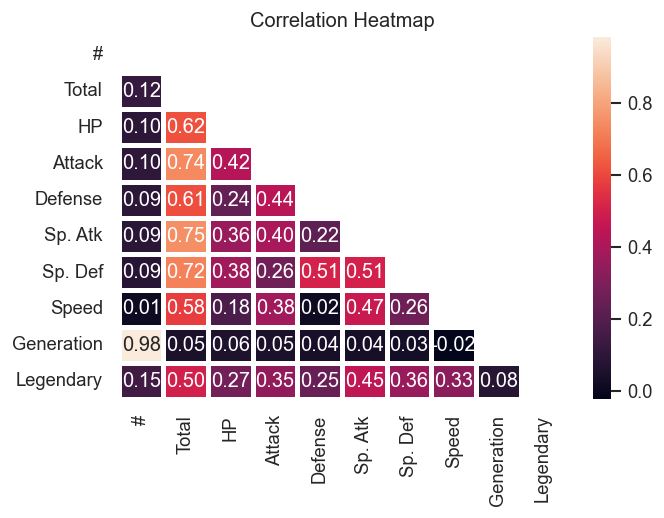

In [36]:
plt.figure(dpi = 120)
toMask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(), mask = toMask , fmt = ".2f",annot=True,lw=2)

plt.title('Correlation Heatmap')

plt.show()

c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


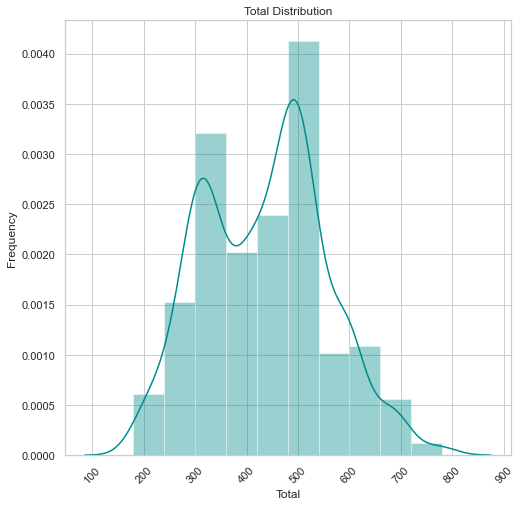

In [87]:
# Total Distribution 


plt.figure(figsize=(8,8))
sns.distplot(x=df['Total'],bins=10,color='darkcyan',kde=True,hist=True)
plt.title('Total Distribution')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


plt.show()

In [46]:
## inka linear regression krdo

<Figure size 720x720 with 0 Axes>

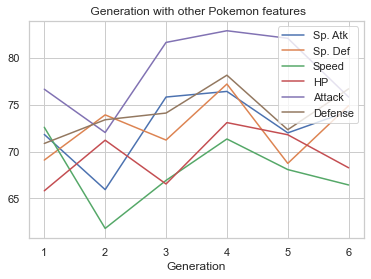

In [88]:


# Generation with other Pokemon features

plt.figure(figsize=(10,10))

pg = df.groupby('Generation').mean()[['Sp. Atk', 'Sp. Def', 'Speed','HP', 'Attack', 'Defense' ]]
pg.plot.line()
plt.title(' Generation with other Pokemon features')
plt.legend(loc='upper right')

plt.show()

We see the general trends of different attributes according to the generation

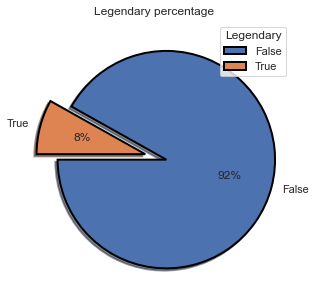

In [71]:
#   Legendary Percentage

plt.figure(figsize=(5,5))
p_r = df['Legendary'].value_counts().head(10)
plt.pie(x=p_r,labels=p_r.index,autopct='%.0f%%',explode=[0.1 for i in p_r.index],startangle=180,wedgeprops={'linewidth':2,'edgecolor':'black'},shadow=True)
plt.title('Legendary percentage ')
plt.legend(loc='upper right',title='Legendary')


plt.show()

<Figure size 1440x720 with 0 Axes>

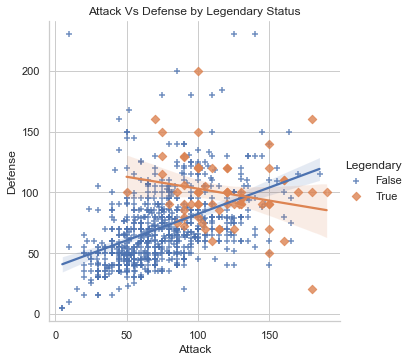

In [94]:
# Attack Vs Defense by Legendary Status

plt.figure(figsize=(20,10))
sns.lmplot(x='Attack', y='Defense', hue='Legendary',  markers=['+', 'D'], fit_reg=True, data=df)
plt.title('Attack Vs Defense by Legendary Status')


plt.show()

<Figure size 1440x720 with 0 Axes>

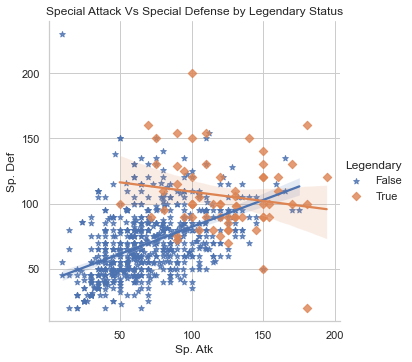

In [96]:
plt.figure(figsize=(20,10))
sns.lmplot(x='Sp. Atk', y='Sp. Def', hue='Legendary',  markers=['*', 'D'], fit_reg=True, data=df)
plt.title('Special Attack Vs Special Defense by Legendary Status')


plt.show()

We can see obviously that the legendary pokemons are the ones which are better at both atack and defences 

<Figure size 432x288 with 0 Axes>

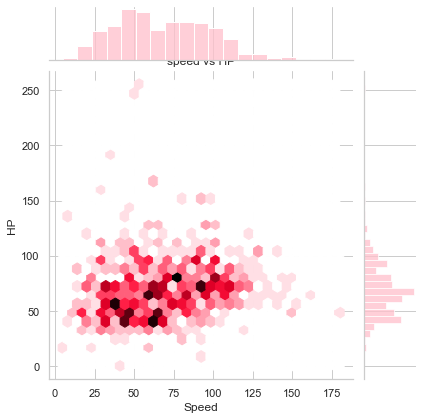

In [83]:
plt.figure()
sns.jointplot(x="Speed",y="HP",data=df, kind = "hex" , color='Pink')

plt.title("speed vs HP")

plt.show()

<Figure size 720x576 with 0 Axes>

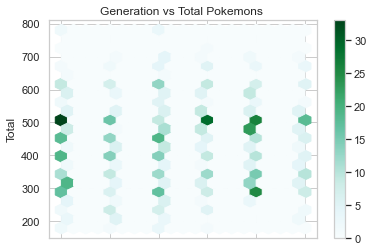

In [91]:
plt.figure(figsize=(10,8))
df.plot.hexbin(x='Generation', y='Total', gridsize=20)
plt.title("Generation vs Total Pokemons ")

plt.xlabel('Generation')
plt.show()

###### max pokemons from gen1 and least from gen 6

## Linear Regression 

In [107]:
reg_X = df.loc[:,"Attack":]
reg_y = pd.DataFrame(df.loc[:,"Sp. Atk"])

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(reg_X.loc[:,"Attack"]), reg_y,random_state = 0)
lr = LinearRegression().fit(X_train, y_train)
x = np.array(reg_X["Attack"])


Text(0, 0.5, 'Sp Atk')

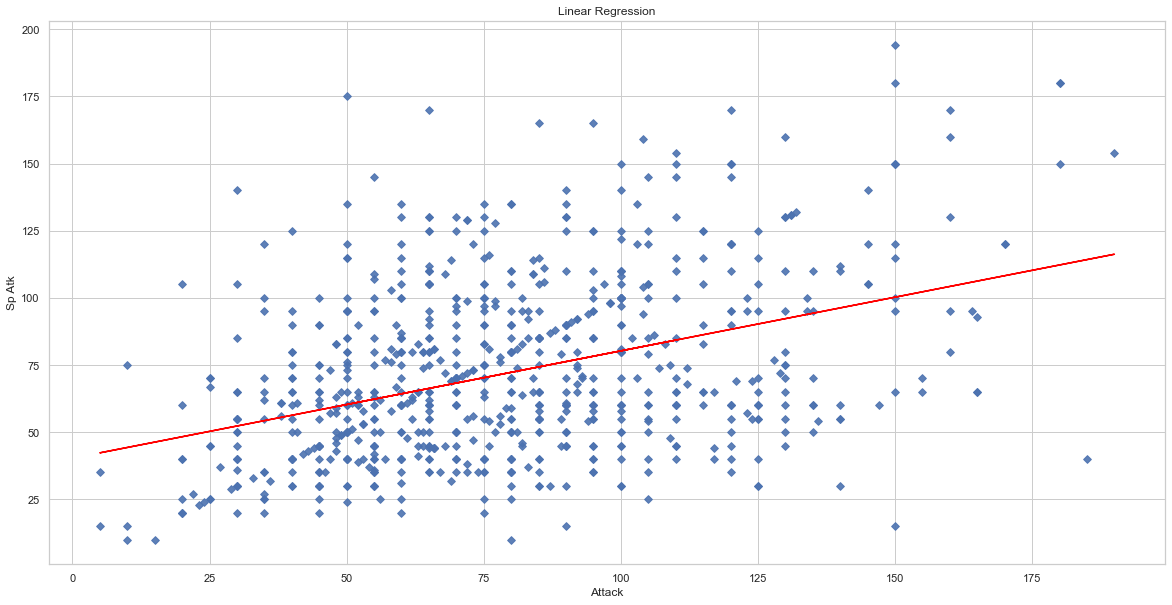

In [108]:
plt.figure(figsize=(20,10))
plt.scatter(reg_X.loc[:,"Attack"], reg_y, marker= 'D', s=30, alpha=0.9, cmap='Blue')
plt.plot(reg_X.loc[:,"Attack"], lr.intercept_+ lr.coef_ * x.reshape(-1,1) , 'Red')

    
plt.title('Linear Regression')
plt.xlabel('Attack')
plt.ylabel('Sp Atk')
          


In [116]:
reg_X2 = df.loc[:,"Defense":]
reg_y2 = pd.DataFrame(df.loc[:,"Sp. Def"])

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(reg_X2.loc[:,"Defense"]), reg_y2,random_state = 0)
lr = LinearRegression().fit(X_train, y_train)
x = np.array(reg_X2["Defense"])


Text(0, 0.5, 'Sp. Def')

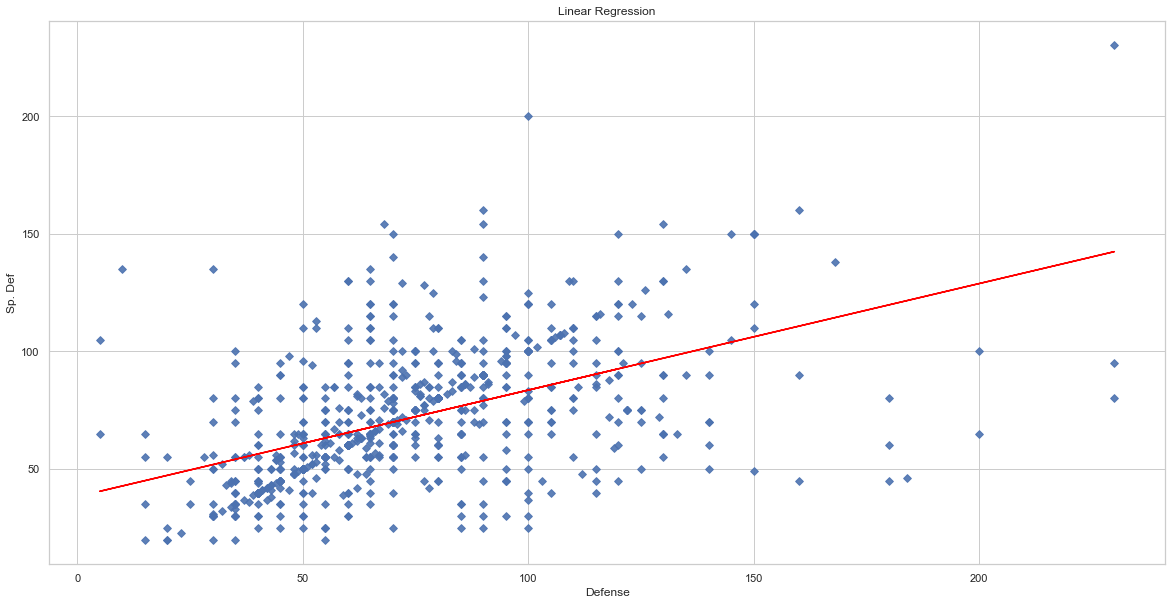

In [117]:
plt.figure(figsize=(20,10))
plt.scatter(reg_X2.loc[:,"Defense"], reg_y2, marker= 'D', s=30, alpha=0.9, cmap='Blue')
plt.plot(reg_X2.loc[:,"Defense"], lr.intercept_+ lr.coef_ * x.reshape(-1,1) , 'Red')

    
plt.title('Linear Regression')
plt.xlabel('Defense')
plt.ylabel('Sp. Def')
          


In [120]:
reg_X2 = df.loc[:,"Defense":]
reg_y3 = pd.DataFrame(df.loc[:,"HP"])

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(reg_X2.loc[:,"Defense"]), reg_y3,random_state = 0)
lr = LinearRegression().fit(X_train, y_train)
x = np.array(reg_X2["Defense"])

Text(0, 0.5, 'HP')

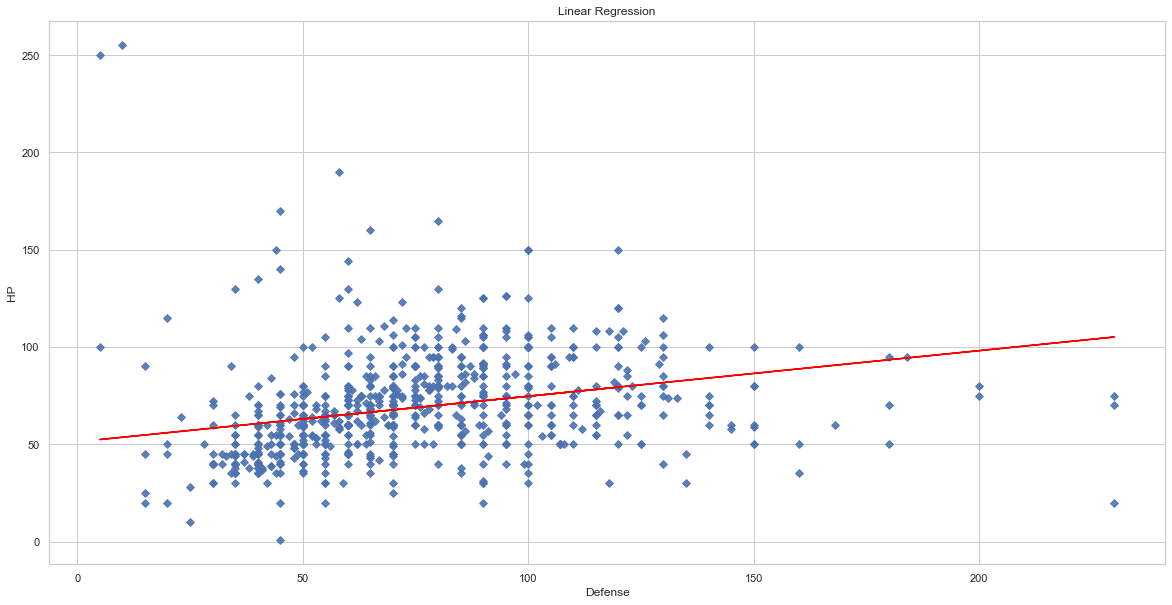

In [121]:
plt.figure(figsize=(20,10))
plt.scatter(reg_X2.loc[:,"Defense"], reg_y3, marker= 'D', s=30, alpha=0.9, cmap='Blue')
plt.plot(reg_X2.loc[:,"Defense"], lr.intercept_+ lr.coef_ * x.reshape(-1,1) , 'Red')

    
plt.title('Linear Regression')
plt.xlabel('Defense')
plt.ylabel('HP')